In [197]:
import pandas as pd
import numpy as np
import matplotlib as plt

plt.rcParams["figure.figsize"]=20,5
pd.options.display.max_rows = 1000000


In [198]:
#Leyendo archivo a un DataFrame de pandas
data = pd.read_csv('DATOSABIERTOS_SISCOVID.csv', encoding='ISO-8859-1')
#Usamos ISO-8859-1 porque los otros nos daban errores:
#utf8 - position 9
#utf7 - position 1515
data.describe()

,UUID,FECHA_NACIMIENTO,SEXO,DEPARTAMENTO,PROVINCIA,DISTRITO,FECHA_PRUEBA,TIPO_PRUEBA
count,108669,104877,101849,108613,108613,108609,108669,108669
unique,96382,31057,4,26,300,1060,205,2
top,f5ff11605dbdbce05c43162735adb104,1972-09-21,MASCULINO,LIMA,LIMA,SAN JUAN DE LURIGANCHO,2020-05-04,PR
freq,140,144,49346,65508,42444,6301,3762,88191


In [199]:
#data[data['FECHA_NACIMIENTO'].str.contains('/')==True].shape#7392
data[data['FECHA_NACIMIENTO'].isnull()==True].shape#(3792, 10)
data[data['FECHA_PRUEBA'].isnull()==True].shape#(0, 8)

(0, 8)

In [200]:
# Maybe first replace the NAN with .isnull(), because later when to_datetime is transformed to NAT
#457      1971-09-12
#458             NaT
#459      1969-02-28
data['FECHA_NACIMIENTO'] = pd.to_datetime(data['FECHA_NACIMIENTO'],errors='ignore')
data['FECHA_PRUEBA'] = pd.to_datetime(data['FECHA_PRUEBA'],errors='ignore')

In [201]:
# Nan for department and province

data[data['DEPARTAMENTO'].isna()==True].shape #(56, 8)
data[data['PROVINCIA'].isna()==True].shape#(56, 8)

(56, 8)

In [202]:
data['DEPARTAMENTO'] = data['DEPARTAMENTO'].fillna('NODEPA')
data['PROVINCIA'] = data['PROVINCIA'].fillna('NOPROV')
data['DISTRITO'] = data['DISTRITO'].fillna('NODIST')

In [203]:
data.describe()

,UUID,FECHA_NACIMIENTO,SEXO,DEPARTAMENTO,PROVINCIA,DISTRITO,FECHA_PRUEBA,TIPO_PRUEBA
count,108669,104877,101849,108669,108669,108669,108669,108669
unique,96382,25468,4,27,301,1061,149,2
top,f5ff11605dbdbce05c43162735adb104,1972-09-21 00:00:00,MASCULINO,LIMA,LIMA,SAN JUAN DE LURIGANCHO,2020-05-05 00:00:00,PR
freq,140,145,49346,65508,42444,6301,4120,88191
first,NaN,1914-06-16 00:00:00,NaN,NaN,NaN,NaN,1981-10-28 00:00:00,NaN
last,NaN,2020-11-03 00:00:00,NaN,NaN,NaN,NaN,2020-12-05 00:00:00,NaN


In [204]:
#Because there are NAN rows, I guess unique can not be done. Yes, it was that.
#np.unique(data['DEPARTAMENTO'])
np.unique(data['PROVINCIA'])
np.unique(data[['DEPARTAMENTO','PROVINCIA']])
#TypeError: '<' not supported between instances of 'str' and 'float'

array(['   ', 'ABANCAY', 'ACOBAMBA', 'ACOMAYO', 'AIJA', 'ALTO AMAZONAS',
       'ALTO AMAZONAS ', 'AMAZONAS', 'AMBO', 'ANCASH', 'ANDAHUAYLAS',
       'ANGARAES', 'ANTA', 'ANTABAMBA', 'APURIMAC', 'AREQUIPA', 'ASCOPE',
       'ASCOPE ', 'ASUNCION', 'ASUNCIÓN', 'ATALAYA', 'ATALAYA ',
       'AYABACA', 'AYABACA ', 'AYACUCHO', 'AYMARAES', 'AZANGARO',
       'AZÁNGARO ', 'BAGUA', 'BARRANCA', 'BARRANCA ', 'BELLAVISTA',
       'BELLAVISTA ', 'BOLOGNESI', 'BONGARA', 'BONGARÁ', 'CAJABAMBA',
       'CAJAMARCA', 'CAJATAMBO', 'CAJATAMBO ', 'CALCA', 'CALLAO',
       'CAMANA', 'CAMANÁ', 'CANAS', 'CANCHIS', 'CANGALLO', 'CANTA',
       'CANTA ', 'CARABAYA ', 'CARAVELI', 'CARAVELÍ', 'CARHUAZ',
       'CARLOS FERMIN FITZCARRALD', 'CARLOS FERMÍN FITZCARRALD', 'CASMA',
       'CASTILLA', 'CASTROVIRREYNA', 'CAYLLOMA', 'CAÑETE', 'CAÑETE ',
       'CELENDIN', 'CELENDÍN', 'CHACHAPOYAS', 'CHANCHAMAYO',
       'CHANCHAMAYO ', 'CHEPEN', 'CHEPÉN ', 'CHICLAYO', 'CHICLAYO ',
       'CHINCHA', 'CHINCHA ', 'CHINCHEROS

In [205]:
np.unique(data[['DEPARTAMENTO','PROVINCIA','DISTRITO']]).to_csv('dep_prov_dist.csv')

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [206]:
byDepartment = data.groupby(['DEPARTAMENTO','PROVINCIA']).agg(['count'])

In [207]:
type(data['FECHA_PRUEBA'])

pandas.core.series.Series

In [208]:
data['FECHA_PRUEBA'].loc[(data['FECHA_PRUEBA'].dt.year<2020)==True]
#4988    2019-10-31
#11089   2019-10-31
#44047   1981-10-28
#Name: FECHA_PRUEBA, dtype: datetime64[ns]


#mixedMonthDay = data['FECHA_PRUEBA'].loc[(data['FECHA_PRUEBA'].dt.month>5)==True & (data['FECHA_PRUEBA'].dt.year>2019)==True]#shape: (6359,)



#4380     2020-06-06
#4988     2019-10-31
#11089    2019-10-31
#44047    1981-10-28
#88592    2020-11-04
#88887    2020-09-05


#data['FECHA_PRUEBA_FIX'] = data['FECHA_PRUEBA']


#pd.DatetimeIndex(data['FECHA_PRUEBA_FIX'].month = pd.DatetimeIndex(data['FECHA_PRUEBA']).day
#data['FECHA_PRUEBA_FIX'].month = pd.DatetimeIndex(data['FECHA_PRUEBA']).day

4988    2019-10-31
11089   2019-10-31
44047   1981-10-28
Name: FECHA_PRUEBA, dtype: datetime64[ns]

In [209]:
data[:100]#.index

,UUID,FECHA_NACIMIENTO,SEXO,DEPARTAMENTO,PROVINCIA,DISTRITO,FECHA_PRUEBA,TIPO_PRUEBA
0,efbb9abe744514f0080d1a216e0d6c7d,1957-03-10,FEMENINO,UCAYALI,CORONEL PORTILLO,CALLERIA,2020-04-28,PR
1,0368274a092b92a9f715d96064b71f15,1947-08-05,FEMENINO,UCAYALI,CORONEL PORTILLO,CALLERIA,2020-05-08,PR
2,2365e9b1bfef2445eb84e815b651c02e,1953-03-19,MASCULINO,UCAYALI,CORONEL PORTILLO,MANANTAY,2020-05-06,PR
3,54840e028c60d5b6679e5c29316c5c43,1957-08-18,MASCULINO,UCAYALI,CORONEL PORTILLO,CALLERIA,2020-05-20,PR
4,6ef1199aca61f7fd151b6e65d9b422d7,1949-09-08,MASCULINO,UCAYALI,CORONEL PORTILLO,MANANTAY,2020-05-01,PR
5,f473a425af530e6dc97f26f0fe0ebff1,1964-10-28,MASCULINO,UCAYALI,CORONEL PORTILLO,CALLERIA,2020-05-14,PR
6,444f273a9763b676a5751e9fafbd0212,1964-02-02,MASCULINO,UCAYALI,CORONEL PORTILLO,YARINACOCHA,2020-04-27,PR
7,444f273a9763b676a5751e9fafbd0212,1964-02-02,MASCULINO,UCAYALI,CORONEL PORTILLO,YARINACOCHA,2020-04-27,PR
8,444f273a9763b676a5751e9fafbd0212,1964-02-02,MASCULINO,UCAYALI,CORONEL PORTILLO,YARINACOCHA,2020-04-27,PR
9,444f273a9763b676a5751e9fafbd0212,1964-02-02,MASCULINO,UCAYALI,CORONEL PORTILLO,YARINACOCHA,2020-04-27,PR


In [210]:
data.shape

(108669, 8)

In [211]:
data = data.loc[(data['FECHA_PRUEBA'].dt.year>2019)==True]

In [212]:
data.shape #(108666, 8)

(108666, 8)

In [213]:
import datetime as dt
#dt.datetime.strptime(data['FECHA_PRUEBA_FIX'], "%Y-%d-%m").strftime("%Y-%m-%d")

#data[mixedMonthDay]
#data['FECHA_PRUEBA'].loc[(data['FECHA_PRUEBA'].dt.month>5)==True].dt
data['FECHA_PRUEBA'].loc[(data['FECHA_PRUEBA'].dt.month>5)==True & (data['FECHA_PRUEBA'].dt.year>2019)] = pd.to_datetime(data['FECHA_PRUEBA'].loc[(data['FECHA_PRUEBA'].dt.month>5)==True & (data['FECHA_PRUEBA'].dt.year>2019)].apply(lambda x: dt.datetime.strftime(x, '%Y-%d-%m')))

In [215]:
data['FECHA_PRUEBA'].loc[(data['FECHA_PRUEBA'].dt.month>5)==True]
#4380   2020-06-06
#Name: FECHA_PRUEBA, dtype: datetime64[ns]

4380   2020-06-06
Name: FECHA_PRUEBA, dtype: datetime64[ns]

In [217]:
data  = data.drop(data.index[4380])

In [218]:
data['FECHA_PRUEBA'].loc[(data['FECHA_PRUEBA'].dt.month>5)==True]
#Should be empty

Series([], Name: FECHA_PRUEBA, dtype: datetime64[ns])

In [131]:
#Join and merge
byDepartmentFecNacSlash = data[data['FECHA_NACIMIENTO'].str.contains('/')==True].groupby(['DEPARTAMENTO','PROVINCIA']).agg(['count'])
joinFecNac = pd.merge(byDepartment, byDepartmentFecNacSlash, how='left', on='DEPARTAMENTO')
joinFecNac[('FECHA_PRUEBA_y','count')]/joinFecNac[('FECHA_PRUEBA_x','count')]

In [232]:
pdPivotDate = pd.Series(pd.date_range('01/03/2020', '22/05/2020', freq='D'))

In [219]:
countByDay = data.groupby(['FECHA_PRUEBA']).agg(['count'])

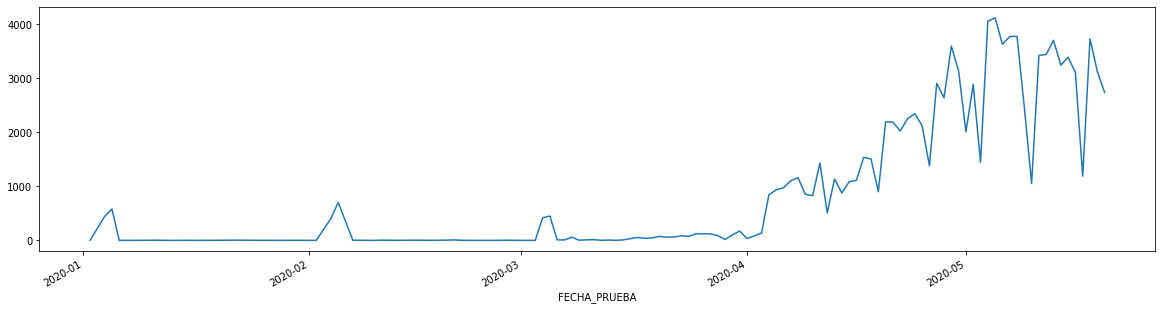

In [221]:
countByDay[('UUID','count')].plot()

In [231]:
countByDay[('UUID','count')]['2020-01-01':'2020-01-15']

FECHA_PRUEBA
2020-01-02      2
2020-01-04    444
2020-01-05    581
2020-01-06      1
2020-01-07      2
2020-01-08      1
2020-01-11      4
2020-01-12      2
2020-01-13      1
2020-01-14      1
2020-01-15      2
Name: (UUID, count), dtype: int64

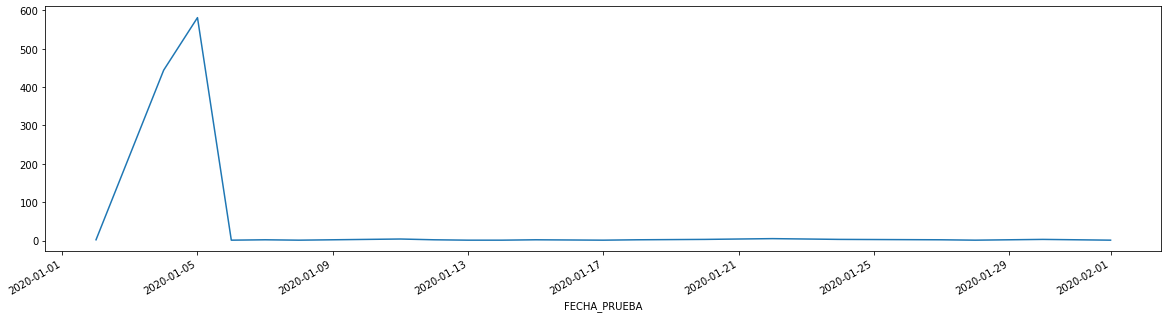

In [228]:
countByDay[('UUID','count')]['2020-01-01':'2020-02-01'].plot()

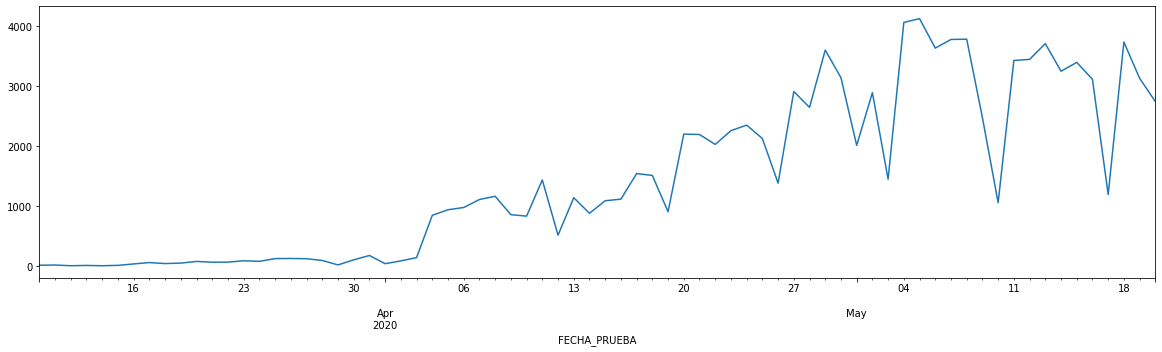

In [264]:
countByDay[('UUID','count')]['2020-03-10':'2020-05-22'].plot()

In [230]:
# Which ones are the departments that do less tests on sundays
data.groupby(['TIPO_PRUEBA']).agg(['count'])
#PCR 20478
#PR 88187

,UUID,FECHA_NACIMIENTO,SEXO,DEPARTAMENTO,PROVINCIA,DISTRITO,FECHA_PRUEBA
,count,count,count,count,count,count,count
TIPO_PRUEBA,,,,,,,
PCR,20478,20409,20478,20478,20478,20478,20478
PR,88187,84464,81367,88187,88187,88187,88187


In [258]:
dataPruebaCount = data.groupby(['TIPO_PRUEBA','FECHA_PRUEBA'])

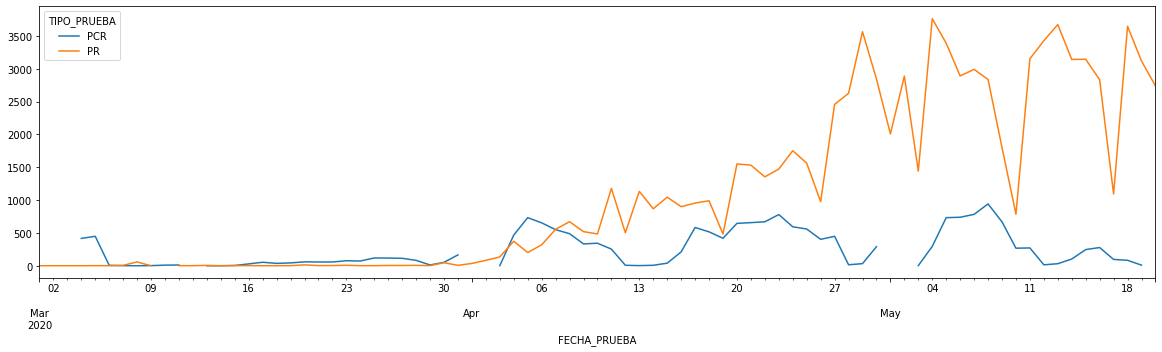

In [259]:
dataPruebaCount.agg(['count']).unstack(level=0)[('UUID','count')]['2020-03-01':].plot()

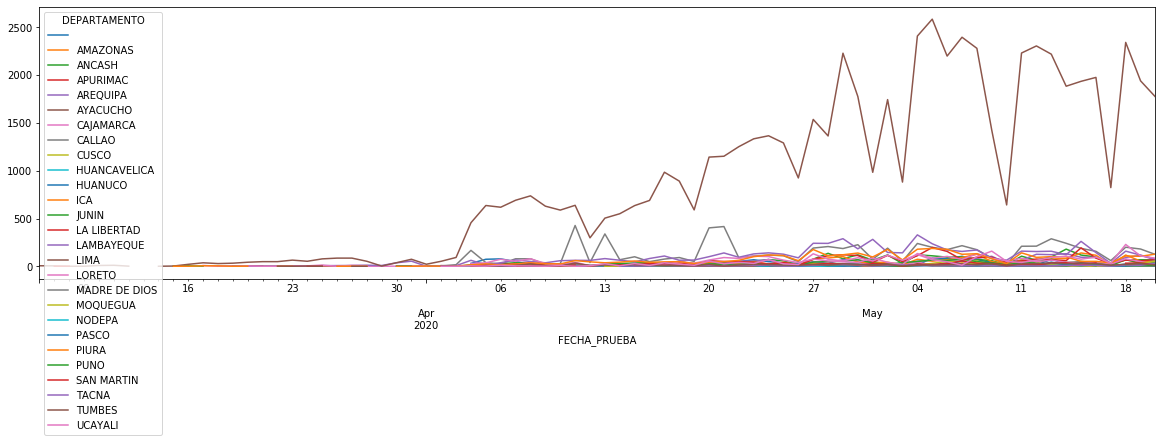

In [255]:
data.groupby(['DEPARTAMENTO','FECHA_PRUEBA']).agg(['count']).unstack(level=0)[('UUID','count')]['2020-03-06':].plot()

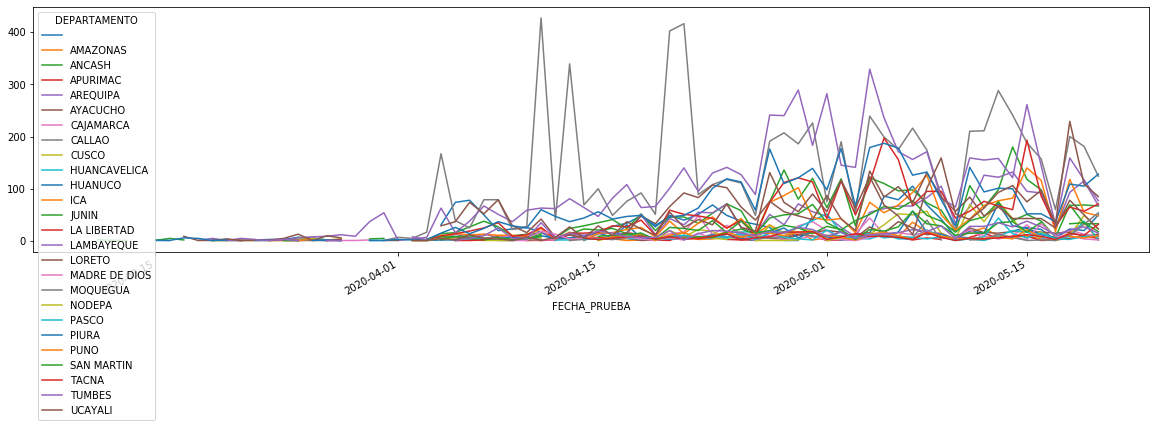

In [256]:
provincias.groupby(['DEPARTAMENTO','FECHA_PRUEBA']).agg(['count']).unstack(level=0)[('UUID','count')]['2020-03-10':].plot()

In [ ]:
## Add columns NORTH, SOUTH, EAST, WEST

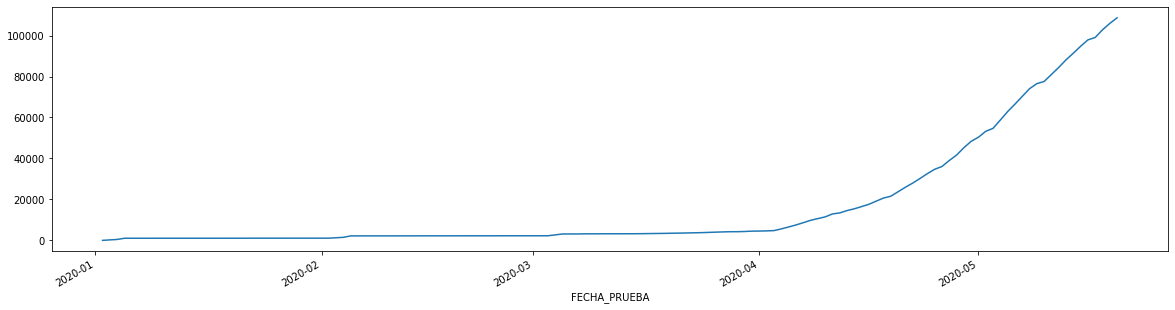

In [263]:
## Analyzing cumulative numbers
countByDay[('UUID','count')].cumsum().plot()